## Visualization

In [1]:
#Show plots in the notebook
%matplotlib inline

from sklearn import datasets, preprocessing, feature_extraction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
try:
    import urllib.request as urllib2
except ImportError:
    import urllib2
import random
import json as json

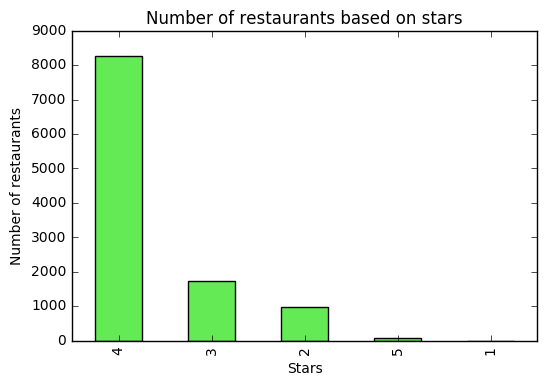

In [2]:
# Using preprocessed data with rounded value of stars
df = pd.read_json('../out/preprocessed_business_data.json')
df_new = df.drop(['attributes','business_id', 'hours', 'index', 'working_type'] , axis=1)

count_of_stars = pd.value_counts(df_new['stars'].values)
count_of_stars.plot(kind='bar',color='#63EA55', title="Number of restaurants based on stars")
plt.xlabel('Stars')
plt.ylabel("Number of restaurants")

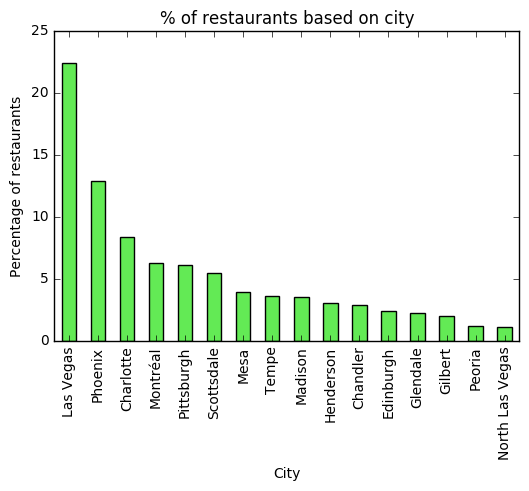

In [ ]:
# Create labels
labels = df_new.loc[:,'stars']

# Create attributes dataframe
df_attrs = df_new.drop(['stars'] , axis=1)

res_city = df_attrs .city.value_counts(dropna=True) / df_attrs.shape[0] * 100

# Eliminating cities with < 1% businesses to make a cleaner plot
res_city_filetered = res_city[res_city.values > 1]
res_city_filetered.plot(kind='bar',color='#63EA55',title="% of restaurants based on city")
plt.xlabel('City')
plt.ylabel("Percentage of restaurants")

In [ ]:
DATASET_DIR = '../../dataset/academic'

import pandas as pd
import operator

df_business = pd.read_json(DATASET_DIR + '/yelp_academic_dataset_business.json', lines=True)

list_categories = set()

for index, row in df_business.iterrows():
    list_categories |= set(row['categories'])
    
number_of_categories = {}
for c in list_categories:
    df_business_category = df_business[df_business['categories'].apply(lambda cs: c in cs)]
    number_of_categories[c] = len(df_business_category)

sorted_number_of_categories = sorted(number_of_categories.items(), key=operator.itemgetter(1), reverse=True)
top_businesses = sorted_number_of_categories[:20]

In [ ]:
top_businesses

In [ ]:
top_businesses_type = [i[0] for i in top_businesses]
top_businesses_number = [i[1] for i in top_businesses]

plt.title('Number of business based on category')
plt.bar(range(len(top_businesses_number)), top_businesses_number, color='#63EA55')
plt.xticks([(i + 0.4) for i in range(len(top_businesses_type))], top_businesses_type, rotation='vertical')

plt.margins(0.05, None)

In [ ]:
accuracy_of_category = {'Restaurants': 0.9402173913043478,
                        'Shopping': 0.8975741239892183,
                        'Food': 0.9332273449920508,
                        'Beauty & Spas': 0.8924731182795699,
                        'Health & Medical': 0.7261146496815286,
                        'Home Services': 0.8431372549019608}

plt.title('Accuracy of business based on category')
plt.bar(range(len(accuracy_of_category)), accuracy_of_category.values(), color=['b', 'r', 'y', 'g', 'c', 'm'])
plt.xticks([(i + 0.4) for i in range(len(accuracy_of_category))], accuracy_of_category.keys(), rotation='vertical')

plt.margins(0.05, None)